<img src="https://upload.wikimedia.org/wikipedia/commons/f/f3/W._P._Carey_School_of_Business_logo.png" width=15% align=left> <br><br>
<img src="https://dealerimages.dealereprocess.com/image/upload/2025555.jpg">

# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. EDA & Data Preparing](#Data-Prep)
* [3. Machine Learning Models](#ml-models)
* [4. Deployment of Model](#model-deployment)


# 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>
    
>**1.1 Problem Statement**<br>
>- Whenever you apply for a loan, banks check your CIBIL Score, Income level, Report, Expenses, Bank Account details, etc to evaluate your credit history and credit worthiness. The higher your score of these parameters, the better are the chances of your loan application getting approved. 79% of loans or credit cards are auto approved for individuals with the following high data points which will be discussed in the analysis like CIBIL Score.

>**1.2 Importance of the Analysis**<br>
>- With the exsisting 340 Million active loans in United States which is expected to reach 40K Billion Dollars by 2030. Mortagage debt accounts for nearly 70% of the US debts, followed by auto loans and student loans, which creates an opportunities to build a Machine Learning model that quickly detect the customers for whom the loan should be approved. Auto Loan model is like a pre approval and filtration of the customers who are eligible for mortage from bank based on multiple attributes. 

>**1.3 Stakeholders**<br> 
>- For this problem, Banks are the key stakeholders, as they will detect whether a loan to be approved based on the customer data or not. This helps in saving a lot of time and selecting potential lenders which helps the bank operate business with customers who will not default the loan and repay the loan with interest. 

>**1.4 End Goal**<br>
>- Accurate analysis, testing and classification of loan approval to the potential customers and back the story by data provided.    

* [Go to Top](#table-of-content)

# 2. EDA & Data Preparation <a class="anchor" id="Data-Prep"></a>


#### Importing the Libraries & Custom Functions <a class="anchor" id="import-packages"></a>
>- Pandas : 
Used for data manipluation. Refer to Pandas Cheatsheet : https://www.datacamp.com/cheat-sheet/pandas-cheat-sheet-for-data-science-in-python <br>
>- Scikit-learn :
Useful and robust library for machine learning. Refer to SKlearn documentation : https://scikit-learn.org/stable/user_guide.html
>- class_perf_measures() : A custom function, which calculates the mean of the target variable w.r.t to every categorical variable type and give the difference 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics


# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy,
                           "F1 Score" : F1
                          })

    # Let's look at our dataframe
    return result

#### Reading the data   <a class="anchor" id="read-data"></a>
>- Link for reading multiple types of input files https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
>- Note: Shift+Tab to look at the parameters any function can take/documentation
* [Go to Top](#table-of-content)

In [2]:
#Reading the data
pd.set_option('display.max_columns', None)
df = pd.read_csv('loan_approval.csv') 
df.head() #df.tail()

,approved,gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,emp_financials,emp_utilities,emp_education,ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,ethnicity_other,years_employed,prior_default,employed,credit_score,drivers_license,citizen_bybirth,citizen_other,citizen_temporary,Income
0,1,1,30.83,0.00,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1.25,1,1,1,0,1,0,0,0
1,1,0,58.67,4.46,1,1,0,1,0,0,0,0,0,0,1,0,0,0,3.04,1,1,6,0,1,0,0,560
2,1,0,24.50,0.50,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1.50,1,0,0,0,1,0,0,824
3,1,1,27.83,1.54,1,1,1,0,0,0,0,0,0,1,0,0,0,0,3.75,1,1,5,1,1,0,0,3
4,1,1,20.17,5.62,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1.71,1,0,0,0,0,1,0,0


#### Descriptive Analysis <a class="anchor" id="EDA"></a>
There are some common steps followed during any analysis however, may differ data to data. Keep following in mind:

- [Initial Evaluation](#initial-evaluation)
- [Initial Cleanup - dupes, missing values](#missing-values)
- [Outlier Detection & Treatment](#outliers)
- [Feature Selection](#feature-selection)
- [Data Partitioning](#data-split)
- [Data Normalization](#normalization)



* [Go to Top](#table-of-content)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   approved               690 non-null    int64  
 1   gender                 690 non-null    int64  
 2   age                    690 non-null    float64
 3   debt                   690 non-null    float64
 4   married                690 non-null    int64  
 5   bank_customer          690 non-null    int64  
 6   emp_industrial         690 non-null    int64  
 7   emp_materials          690 non-null    int64  
 8   emp_consumer_services  690 non-null    int64  
 9   emp_healthcare         690 non-null    int64  
 10  emp_financials         690 non-null    int64  
 11  emp_utilities          690 non-null    int64  
 12  emp_education          690 non-null    int64  
 13  ethnicity_white        690 non-null    int64  
 14  ethnicity_black        690 non-null    int64  
 15  ethnic

### Initial Observations
>- **Rows- 690 & Columns- 27** (3: float, 24: int)
>- **Data Interpretation** <br><br>

| #   | Column                | Sensitive | Comments/importance |   
|-----|-----------------------|-----------|---------|
| 0   | approved              |    -      | Target variable, whether to approve the loan or not  |   
| 1   | gender                | yes       | male/female/others  |   
| 2   | age                   |    -      | assump. - that it is more suitable to give loan to a 30 years person than 20 |   
| 3   | debt                  | -         | exisiting debt |   
| 4   | married               | -         | maybe to know the dependencies   |   
| 5   | bank_customer         | -         | have an exisiting account with the bank  |   
| 6   | emp_industrial        | -         | employment industry type    |   
| 7   | emp_materials         | -         | employment industry type    |   
| 8   | emp_consumer_services | -         | employment industry type    |   
| 9   | emp_healthcare        | -         | employment industry type    |   
| 10  | emp_financials        | -         | employment industry type    |  
| 11  | emp_utilities         | -         | employment industry type    |   
| 12  | emp_education         | -         | employment industry type    |  
| 13  | ethnicity_white       | yes       | ethinicity type   |   
| 14  | ethnicity_black       | yes       | ethinicity type   |   
| 15  | ethnicity_latino      | yes       | ethinicity type   |   
| 16  | ethnicity_asian       | yes       | ethinicity type   |   
| 17  | ethnicity_other       | yes       | ethinicity type   |    
| 18  | years_employed        | -         | number of years customer is employed |  
| 19  | prior_default         | -         | any prior loan that was defaulted   |   
| 20  | employed              | -         | employment status   |   
| 21  | credit_score          | -         | credit history based on prior expenses   |   
| 22  | drivers_license       | yes       | ID - not assuming it to be crutial though  |   
| 23  | citizen_bybirth       | -         | whether a person is citizen or not, not convinced whther this could be helpful |
| 24  | citizen_other         | -         | not convinced whther this could be helpful  |   
| 25  | citizen_temporary     | -         | not convinced whther this could be helpfulint64   |   
| 26  | Income                | -         | crutial for the model  |   

>- **Target Variable: Approved** <br>

In [4]:
df.describe()

,approved,gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,emp_financials,emp_utilities,emp_education,ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,ethnicity_other,years_employed,prior_default,employed,credit_score,drivers_license,citizen_bybirth,citizen_other,citizen_temporary,Income
count,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00,690.00
mean,0.44,0.70,31.51,4.76,0.76,0.76,0.36,0.12,0.21,0.08,0.09,0.11,0.04,0.59,0.20,0.08,0.09,0.04,2.22,0.52,0.43,2.40,0.46,0.91,0.08,0.01,1017.39
std,0.50,0.46,11.86,4.98,0.43,0.43,0.48,0.32,0.41,0.27,0.28,0.32,0.19,0.49,0.40,0.28,0.28,0.20,3.35,0.50,0.50,4.86,0.50,0.29,0.28,0.11,5210.10
min,0.00,0.00,13.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,22.67,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
50%,0.00,1.00,28.46,2.75,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,5.00
75%,1.00,1.00,37.71,7.21,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,2.62,1.00,1.00,3.00,1.00,1.00,0.00,0.00,395.50
max,1.00,1.00,80.25,28.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,28.50,1.00,1.00,67.00,1.00,1.00,1.00,1.00,100000.00


#### Missing & Duplicates Records

* [Go to Top](#table-of-content)

In [5]:
#counting the duplicates
print(df.duplicated().value_counts())                             
df.shape                                                          

False    690
dtype: int64


(690, 27)

#### Outlier Detection and Treatment 

* [Go to Top](#table-of-content)

In [6]:
#working on numerical columns first
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics)

In [7]:
pd.DataFrame(dict(mean = df_numeric.mean().round(2),
                  median = df_numeric.median().round(2),
                  std_dev = df_numeric.std().round(2),
                  min_val = df_numeric.min(),
                  max_val = df_numeric.max(),
                  missing_vals = df_numeric.isnull().sum()
                  
                 ))

,mean,median,std_dev,min_val,max_val,missing_vals
approved,0.44,0.00,0.50,0.00,1.00,0
gender,0.70,1.00,0.46,0.00,1.00,0
age,31.51,28.46,11.86,13.75,80.25,0
debt,4.76,2.75,4.98,0.00,28.00,0
married,0.76,1.00,0.43,0.00,1.00,0
bank_customer,0.76,1.00,0.43,0.00,1.00,0
emp_industrial,0.36,0.00,0.48,0.00,1.00,0
emp_materials,0.12,0.00,0.32,0.00,1.00,0
emp_consumer_services,0.21,0.00,0.41,0.00,1.00,0
emp_healthcare,0.08,0.00,0.27,0.00,1.00,0


## Feature Selection

> **Data Partitioning** <a class="anchor" id="data-split"></a>
<br>
>To Do:<br>
>1. Put all potential predictor variables into new object called 'X'.(dropping the sensitive data)
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>

>This is simple for now - may need to add more sampling complexity in future

* [Go to Top](#table-of-content)

In [8]:
target = ['approved']
sensitive_data = ['gender', 'ethnicity_white','ethnicity_black','ethnicity_latino','ethnicity_asian','ethnicity_other','drivers_license']


In [9]:
X = df.drop(target,axis=1)
X = X.drop(sensitive_data,axis = 1)
y = df[target]

In [10]:
# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=4)

> **Data Normalization** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this AFTER splitting the data because we only want to use summary stats<br>
>from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
<br><br>

* [Go to Top](#table-of-content)

#### Normalize predictor variables using Z-Scores.
 Use means and standard deviations of features as calculated in the TRAINING DATA
 New values are centered at 0.  Values reflect the number of standard deviations
 each record is above or below the mean.

In [11]:
features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

In [12]:
features_means.values

array([3.11376812e+01, 4.76855072e+00, 7.53623188e-01, 7.57763975e-01,
       3.80952381e-01, 1.15942029e-01, 2.00828157e-01, 7.24637681e-02,
       7.66045549e-02, 1.22153209e-01, 3.10559006e-02, 2.26573499e+00,
       5.25879917e-01, 4.30641822e-01, 2.54451346e+00, 9.06832298e-01,
       8.28157350e-02, 1.03519669e-02, 1.06914493e+03])

### Initial Summary:

>- Dataframe - (690,27)
>-Target Variable - Approved
>-Mising Values - No
>-Outliers - No major skewness in the data, will circle back if needed
>-Feature Selection - Including everthing except the sensitive data since that will not be accessible in the real sceanario
>-Data Normalisation - Essential for KNN model

* [Go to Top](#table-of-content)

## Machine Learning Models <a class="anchor" id="ml-models"></a>

> **Model 1 - kNN** <a class="anchor" id="first-model"></a>
<br>
>To do:<br>
>1. Fit numerous kNN models using different values for k. <br>
>2. Choose the "best" value for "k" based on Accuracy using the plot

In [13]:
# 1. train a classifier for different values of k
results = []
for k in range(1,15): #[1,3,4,5,7,9,11,13,15,17,19,21]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class),
                    'recall':metrics.recall_score(y_test,y_pred_class),
                    'precision':metrics.precision_score(y_test,y_pred_class)
                                                      
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy,recall,precision
0,1,0.81,0.78,0.77
1,2,0.79,0.62,0.83
2,3,0.83,0.77,0.80
3,4,0.83,0.71,0.86
4,5,0.82,0.76,0.80
5,6,0.81,0.70,0.82
6,7,0.82,0.73,0.81
7,8,0.81,0.67,0.83
8,9,0.81,0.71,0.80
9,10,0.81,0.71,0.81


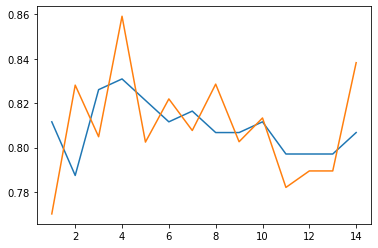

In [14]:
plt.plot(results_df['k'],results_df['accuracy'])
plt.plot(results_df['k'],results_df['precision'])
#plt.plot(results_df['k'],results_df['recall'])

>**Decision:**<br>
Observation 1: Based on the results above, setting number of neighbors (k) to 3 as this is the lowest value that achieves the highest accuracy value. However, K= 3 can be a sign of overfitting, hence looking at other performance measures.
Observation 2: Based on precision (assuming that bank would be interested in FP), I set my **k = 4**. 
<br>

>**Re-run kNN using the value selected above:**<br>
For this final run of KNN, we will produce a table of performance measures across a range of probability threshold values or can be seen from the plot that post k=4, the accuracy started dropping

In [15]:
knn = KNeighborsClassifier(n_neighbors=4, weights = 'uniform')
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

print('Training data Precision:', metrics.precision_score(y_train,y_train_pred_class).round(2))
print('Testing data Precision:', metrics.precision_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.88
Testing data Accuracy: 0.83
Training data Precision: 0.92
Testing data Precision: 0.86


In [16]:
class_perf_measures(knn,X_test,y_test)

,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy,F1 Score
0,0.00,86,0,121,0,0.41,1.00,0.42,0.59
1,0.10,78,81,40,8,0.66,0.91,0.77,0.76
2,0.20,78,81,40,8,0.66,0.91,0.77,0.76
3,0.30,71,101,20,15,0.78,0.83,0.83,0.80
4,0.40,71,101,20,15,0.78,0.83,0.83,0.80
5,0.50,71,101,20,15,0.78,0.83,0.83,0.80
6,0.60,61,111,10,25,0.86,0.71,0.83,0.78
7,0.70,61,111,10,25,0.86,0.71,0.83,0.78
8,0.80,38,116,5,48,0.88,0.44,0.74,0.59
9,0.90,38,116,5,48,0.88,0.44,0.74,0.59


Overview of the Knn class performance <br>
threshold: ranges from 0-1, is the probability for selecting the 1 class which is loan approved <br>
TP, TN, FP & FN are the classes which will be discussed in details below

> **Model 2 - Logistics** <a class="anchor" id="second-model"></a>
<br>
>To do:<br>
>1. Fit the model. <br>

In [17]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))
lr_model.coef_

Training data Accuracy: 0.88
Testing data Accuracy: 0.85


array([[ 0.07087638,  0.12083126, -0.28085928,  0.62370441,  0.01284664,
         0.1130214 , -0.17558116, -0.40592635, -0.27823008,  0.63063597,
         0.00372152,  0.30314145,  1.64305547,  0.52832372,  0.37029421,
        -0.07211995, -0.02604948,  0.27803971,  1.3008348 ]])

>**Winning Model:**<br>
We need to quickly decide which modeling framework to go forward with<br>
To keep this simple - I'm going to use AUC and will choose the model that gives us the highest value

* [Go to Top](#table-of-content)

C:\Users\vsagar3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


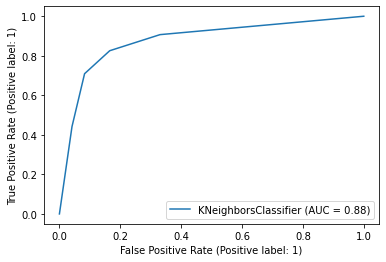

C:\Users\vsagar3\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


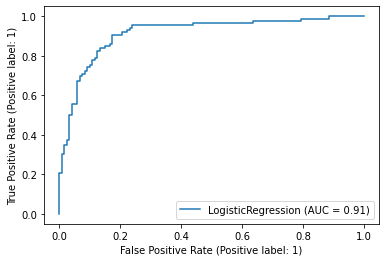

In [18]:
# ROC curve for kNN
metrics.plot_roc_curve(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.plot_roc_curve(lr_model,X_test,y_test)
plt.show()

>**Decision Point:**<br>
AUC is highest for our Logistic Model so I will use that model to further evaluate probability thresholds and corresponding performance measures

In [19]:
class_perf_measures(lr_model,X_test,y_test)

C:\Users\vsagar3\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy,F1 Score
0,0.00,86,0,121,0,0.41,1.00,0.42,0.59
1,0.10,82,78,43,4,0.66,0.95,0.77,0.78
2,0.20,82,90,31,4,0.73,0.95,0.83,0.82
3,0.30,80,93,28,6,0.74,0.93,0.84,0.82
4,0.40,76,100,21,10,0.78,0.88,0.85,0.83
5,0.50,72,104,17,14,0.81,0.84,0.85,0.82
6,0.60,65,108,13,21,0.83,0.76,0.84,0.79
7,0.70,60,113,8,26,0.88,0.70,0.84,0.78
8,0.80,55,114,7,31,0.89,0.64,0.82,0.74
9,0.90,35,117,4,51,0.90,0.41,0.73,0.56


### Logistics Model class performance evaluation
**Confusion Matrix**

|         |              |   Predicted  |          |   |
|---------|--------------|:------------:|:--------:|---|
|         |   | 0            | 1    |   |
| Actuals | 0 | TN           | FP       |   |
|         | 1 | FN           | TP       |   |

1. **Prob Threshold = 0.2** (Low threshold): 

|         |              |   Predicted  |          |   |
|---------|--------------|:------------:|:--------:|---|
|         |              | Not Approved | Approved |   |
| Actuals | Not Approved | 90           | 31       |   |
|         | Approved     | 04           | 82       |   |


>- **Interpretation**: The model accurately predicts (by a measure of 83%) whether loan for a customer should be approved or not. However, accuracy is not the paramount in this problem since for a bank, the agenda is to attract customer and make profit. Recall & Precision makes sense, once we find out which class (FN / FP) to minimise.  
With less threshold, it is expected to have more loan approvals (TP + FP). In our case "positive" means "loan is approved." 

>- **False Positives FPs & Business Impact** : False Positive indicates that the model approved the loan when it should not approve, hence we also see a lot of false positive (FP) class -31 . The model will approve loan for customers that has 20% of repaying credibility based on the data available. That evidently can be potential loss for the bank. Because there is 80% chance that the customer whose loan is approved by the bank will not be paid back. Therefore, these 15% of the customer which are False positives are costlier for the bank. 

>- **False Negative FNs & Business Impact** - with more FP, it is expected to have less FN - 4. It implies that with 0.2 threshold, only 2% of the future customers whose loan should be approved would be rejected due to low threshold. From the bank's perspective, though it is a loss on loosing the potential customers, however it is not as costlier than lending it to customers who's probability of returning is severely low (FP)
    
>- Hence, to conclude, we should move to the next threshold, because we want to reduce the FN which are more expensive for the bank 
<br><br>


2. **Prob Threshold = 0.6** (intermediate threshold): 

|         |              |   Predicted  |          |   |
|---------|--------------|:------------:|:--------:|---|
|         |              | Not Approved | Approved |   |
| Actuals | Not Approved | 108          | 13       |   |
|         | Approved     | 21           | 65       |   |


>- **Interpretation**: The model accurately predicts (by a measure of 84%) whether loan for a customer should be approved or not. However, accuracy is not the paramount in this problem since for a bank, the agenda is to attract customer and make profit. Precision :Out of all the customers' approval the model predicted, 83% of the times it was actually approved.  
Recall : Out of all the customers whos loan was approved, our model was able to correctly identify 76% of them.

>- **False Positives FPs & Business Impact** : False Positive indicates that the model approved the loan when it should not approve, we see relatively less false positive (FP) class -13 . The model will approve loan for customers that has 60% of repaying credibility based on the data available, which actually is much better than 0.20 threshold. However, there is still 40% chance that the customer whose loan is approved by the bank will not be paid back, hence to minimise the FP, we will move to nenxt threshold. 

>- **False Negative FNs & Business Impact** - with less FP, it is expected to have more FN class - 21. It implies that with 0.6 threshold, 10% of the future customers whose loan should be approved would be rejected. From the bank's perspective, though it is a loss on loosing the potential customers.

>- **Comparison** : Even though, we do see some improvement in FP at 0.6 threshold as compared to the 0.2 threshold with reduced # of cutomers whose loan should be rejected (FP) (from 31 to 13), however the agenda is to accurately predict the auto loan with minimising the loss (# of FP), we will move to nect threshold before taking a final call.
    
<br><br>

3. **Prob Threshold = 0.8** (High threshold): 

|         |              |   Predicted  |          |   |
|---------|--------------|:------------:|:--------:|---|
|         |              | Not Approved | Approved |   |
| Actuals | Not Approved | 154          | 07       |   |
|         | Approved     | 31           | 55       |   |


>- **Interpretation**: The model accurately predicts (by a measure of 82%) whether loan for a customer should be approved or not. Accuracy is not the paramount in this problem since for a bank, the agenda is to attract customer and make profit, however it dropped from 0.6 threshold. 
Precision :Out of all the customers' approval the model predicted, 89% of the times it was actually approved. (improved from 0.60 threshold) 
Recall : Out of all the customers whos loan was approved, our model was able to correctly identify 64% of them.

>- **False Positives FPs & Business Impact** : False Positive indicates that the model approved the loan when it should not approve, we see relatively less false positive (FP) class -07 . The model will approve loan for 3% of total customers that has 80% of repaying credibility based on the data available, which actually is much better than 0.60 threshold (6% of total customers). 

>- **False Negative FNs & Business Impact** - with less FP, it is expected to have LOT more FN class - 31. It implies that with 0.8 threshold, the bank will loss on 15% of the credible future customers whose loan should be approved but would got rejected by the model. From the bank's perspective, though it is a loss on loosing the potential customers.

>- **Comparison** : Even though, we do see huge improvement in FP at 0.8 threshold as compared to the 0.2 and 0.6 threshold with precision of 73% - 89% (and reduced # of cutomers whose loan should be rejected (FP) (from 31 to 07). It is better to choose 80% (or even more) threshold for approval and rejection of the loan application by customers because, less threshold increases the loss involved in defaulting the loan whereas, with higher threshold, the model reduces the chances of approving the loan for customers who can deafult and won't pay. 
    
<br><br>

4. **My choice of Prob. Threshold = 0.8 (atleast 0.8)**

>- The model should atleast approve loan for customers with 80% prob of repaying. Though it can vary upon bank to bank but, as per my opinion the threshold should be atleat 80% or more. Higher probability threshold might counter on approving the loan for some potential customers. But from a bank's perspective, there would be further multiple wasy of attracting more customers by lowering the interest rate or providing other benfits rather than compromising on selection of credible customers.  
>- With the growing debt on American banks, it is very crutial to not compromise on selecting the credible customers. However, for the potential customers, our bank can go through some additional scrutiny and data points in order to keep up with the objective of minimising the loss and customer penetration.

In [20]:
import pickle
pickle_out = open('classifier2', mode='wb')
pickle.dump([lr_model,features_means,features_std], pickle_out)
pickle_out.close()

In [21]:
%%writefile app2.py

import pickle
import streamlit as st
import math
import pandas as pd
import numpy as np

st.header("Loan Application Predicition")


pickle_in = open('classifier2', 'rb')
lr_model,features_means,features_std = pickle.load(pickle_in)

# @st.cache()


# Define the function which will make the prediction using data
# inputs from users

def getColumnNames():
    return ['age', 'debt', 'married', 'bank_customer', 'emp_industrial',
       'emp_materials', 'emp_consumer_services', 'emp_healthcare',
       'emp_financials', 'emp_utilities', 'emp_education', 'years_employed',
       'prior_default', 'employed', 'credit_score', 'citizen_bybirth',
       'citizen_other', 'citizen_temporary', 'Income']


def prediction(age, debt, married, bank_customer,emp_type, years_employed, prior_default, employed, credit_score, citizen_bybirth,
       citizen_other, citizen_temporary, Income):
    
    #initialization
        
    Emp_Type_dict = {'Industrial':0,
                'Materials':0,
                'Consumer Services':0,
                'Healthcare':0,
                'Financials':0,
                'Utilities':0,
               'Education':0}
    
   
    #value population
    for key in Emp_Type_dict:
        if key == emp_type:
            Emp_Type_dict[key] = 1
            
    lst = [married, bank_customer, employed, citizen_bybirth,citizen_other, citizen_temporary]
    
    for i in range(len(lst)):
        if lst[i] == 'Yes':
            lst[i] = 1
        else:
            lst[i] = 0  
            
    
    lst_prior_default = prior_default
    if lst_prior_default == 'No':
        lst_prior_default = 1
    else:
        lst_prior_default = 0

    my_test_df = pd.DataFrame([[age, debt, lst[0], lst[1], 
                                Emp_Type_dict.get('Industrial'), Emp_Type_dict.get('Materials'),Emp_Type_dict.get('Consumer Services'), 
                                Emp_Type_dict.get('Healthcare'),Emp_Type_dict.get('Financials') ,Emp_Type_dict.get('Utilities'), 
                                Emp_Type_dict.get('Education'),
                                years_employed,lst_prior_default,lst[2], credit_score, lst[3],
                                lst[4], lst[5], Income]],
                              columns=getColumnNames())
    
    my_test_df = (my_test_df - features_means)/features_std
       
    # Make predictions
    prediction = lr_model.predict_proba(my_test_df)
    THRESHOLD = 0.80
    if prediction[0][1] >= THRESHOLD:
        return 'Congratulations, your loan is approved!'
    else: 
        return 'You do not meet the criteria, Your loan is rejected'

# This is the main function in which we define our webpage
def main():
    
    # Create input fields
    age = st.number_input("Age of the Customer",
                                  min_value=0.00,
                                  max_value=90.00,
                                  value=25.50,
                                  step=0.50,
                                 )
               
    debt = st.number_input("Debt",
                                  min_value=0.00,
                                  max_value=90.00,
                                  value=25.50,
                                  step=0.50,
                                 )
    st.write('<style>div.row-widget.stRadio > div{flex-direction:row;}</style>', unsafe_allow_html=True)
    
    married = st.radio('Marital Status', ('Yes','No'))
    
    bank_customer = st.radio('Existing bank customer', ('Yes','No'))
    
    years_employed = st.number_input("Experience (in years)",
                                  min_value=0.00,
                                  max_value=90.00,
                                  value=25.50,
                                  step=0.50,
                                 )
    
    lst_prior_default = st.radio('Defaulted loan in past', ('Yes','No'))
    
    employed = st.radio('Are you currently employed?', ('Yes','No'))
    
    credit_score = st.number_input("Credit Score",
                                  min_value=0.00,
                                  max_value=90.00,
                                  value=25.50,
                                  step=0.50,
                                 )
    
    citizen_bybirth = st.radio('Are you citizen by birth?', ('Yes','No'))
    
    citizen_other = st.radio('Are you citizen of any other country', ('Yes','No'))
    
    citizen_temporary = st.radio('Are you a temporary citizen', ('Yes','No'))
    
    Income = st.number_input("Income",
                                  min_value=0.00,
                                  max_value=9000000.00,
                                  value=25.50,
                                  step=0.50,
                                 )
    
    emp_type = st.selectbox('Employement Type',('Industrial',
                'Materials',
                'Consumer Services',
                'Healthcare',
                'Financials',
                'Utilities',
               'Education'))
    
               
    result = ""
    
    # When 'Predict' is clicked, make the prediction and store it
    if st.button("Check your eligibilty"):
        result = prediction(age, debt, married, bank_customer, emp_type, 
                            years_employed, lst_prior_default, employed, 
                            credit_score, citizen_bybirth,
                           citizen_other, citizen_temporary, Income)
        st.success(result)
        
if __name__=='__main__':
    main()

Writing app2.py


In [22]:
!streamlit run app2.py

^C
